In [1]:
%matplotlib notebook
import numpy as np
import scipy

from scipy import sparse
from scipy.sparse import linalg
from numpy import pi, sin

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import animation

def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

<IPython.core.display.Javascript object>


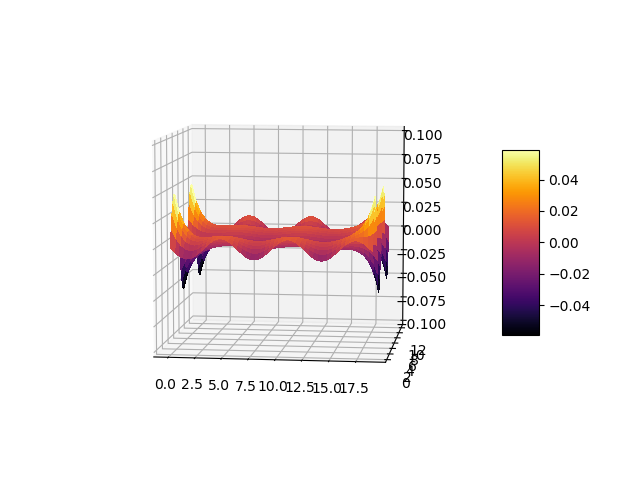

In [2]:
def mu(x,y):
    z = np.zeros((len(y),len(x)))
    for i in range(len(x)):
        for j in range(len(y)):
            z[j][i] = -0.01*sin(x[i]) + 0.05*sin(y[j])
    return z

a = 6*pi
b = 4*pi
T = 10
hx = pi/30
hy = hx
tau = 0.1
k = 0.2

x = np.arange(0, a+hx, hx)
y = np.arange(0, b+hy, hy)
y = y[:-1]
t = np.arange(0, T+tau, tau)

u = np.zeros((len(t), len(y), len(x)))
u[0] = mu(x,y)
for i in range(1,len(t)):
    u[i,0,:] = np.squeeze(mu(x,[0]))
    u[i,-1,:] = np.squeeze(mu(x,[b]))
    u[i,:,0] = np.squeeze(mu([0],y))
    u[i,:,-1] = np.squeeze(mu([a],y))

u0 = u
diff_op_x = np.zeros((len(x),len(x)),dtype= np.float64)
for n in range(1, len(x)-1):
    diff_op_x[n][n-1] = 1
    diff_op_x[n][n] = -2
    diff_op_x[n][n+1] = 1
diff_op_x = k/hx**2 * diff_op_x.T

diff_op_y = np.zeros((len(y),len(y)),dtype= np.float64)
for n in range(1, len(y)-1):
    diff_op_y[n][n-1] = 1
    diff_op_y[n][n] = -2
    diff_op_y[n][n+1] = 1
diff_op_y = k/hy**2 * diff_op_y

Px = np.eye(len(x), dtype=np.float64) - tau*diff_op_x/2.0;

Py = np.eye(len(y), dtype=np.float64) - tau*diff_op_y/2.0;

for i in range(len(t)-1):
    F = np.matrix(u[i])*np.matrix(diff_op_x) + np.matrix(diff_op_y)*np.matrix(u[i])
    #nu = sparse.csc_matrix(F)*sparse.linalg.inv(Px)
    nu = sparse.csc_matrix(F)*np.linalg.inv(Px)
    #(A'\B')'
    #nu = sparse.csc_matrix(scipy.sparse.linalg.spsolve(sparse.csc_matrix(Px.T), sparse.csc_matrix(F.T)).T)
    #du = scipy.sparse.linalg.spsolve(Py, sparse.csc_matrix(nu))
    du = np.linalg.solve(Py, nu)
    du[0,:] = np.zeros(du[0,:].shape)
    du[-1,:] = np.zeros(du[-1,:].shape)
    du[:,0] = np.zeros(du[:,0].shape)
    du[:,-1] = np.zeros(du[:,-1].shape)
    u[i+1] = np.matrix(u[i]) + tau*du

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X, Y = np.meshgrid(x, y)

# Plot the surface.
surf = ax.plot_surface(X, Y, u[0], cmap=cm.inferno, linewidth=1, antialiased=True)

# Customize the z axis.
ax.set_zlim(-0.1,0.1)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlim(0,a)
ax.set_ylim(0,b)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

def animate(n):
    ax.clear()
    ax.set_zlim(-0.1,0.1)
    surf = ax.plot_surface(X, Y, u[n], cmap=cm.inferno, linewidth=0, antialiased=False)
    return surf,

anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=100, repeat = False)

plt.show()

In [6]:
u[0,:] = np.zeros(u[0,:].shape)
u[-1,:] = np.zeros(u[-1,:].shape)
u[:,0] = np.zeros(u[:,0].shape)
u[:,-1] = np.zeros(u[:,-1].shape)
u

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.00522642,  0.00409842,  0.00308504, ...,  0.00716101,
          0.00614763,  0.00522642],
        [ 0.01039558,  0.00916531,  0.00815193, ...,  0.0122279 ,
          0.01121452,  0.01039558],
        ...,
        [-0.01039558, -0.01121452, -0.0122279 , ..., -